# Krzysztof Tomala - Explainable AI - Homework 1

# Introduction

I have decided to analysie the Heart Attack Analysis & Prediction Dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

To analysie it I am going to use 3 classification models: logistic regression, random forest and neural netwok.

In [1]:
import pandas as pd
import sklearn
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Loading and preprocessing data

I am loading the dataset and changing categorical variables to one-hot encoded.

In [2]:
dataset = pd.read_csv('heart.csv')
dataset = pd.get_dummies(dataset)
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


I am crating data frame containing features that will be used for prediction.

In [3]:
features = dataset.drop(columns='output')
features

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


I am normalizing the data.

In [4]:
for i in features.columns:
    features[i] = (features[i]-features[i].min())/(features[i].max())
features

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.441558,1.0,1.000000,0.255,0.189716,1.0,0.0,0.391089,0.0,0.370968,0.0,0.00,0.333333
1,0.103896,1.0,0.666667,0.180,0.219858,0.0,0.5,0.574257,0.0,0.564516,0.0,0.00,0.666667
2,0.155844,0.0,0.333333,0.180,0.138298,0.0,0.0,0.500000,0.0,0.225806,1.0,0.00,0.666667
3,0.350649,1.0,0.333333,0.130,0.195035,0.0,0.5,0.529703,0.0,0.129032,1.0,0.00,0.666667
4,0.363636,0.0,0.000000,0.130,0.404255,0.0,0.5,0.455446,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.363636,0.0,0.000000,0.230,0.203901,0.0,0.5,0.257426,1.0,0.032258,0.5,0.00,1.000000
299,0.207792,1.0,1.000000,0.080,0.244681,0.0,0.5,0.301980,0.0,0.193548,0.5,0.00,1.000000
300,0.506494,1.0,0.000000,0.250,0.118794,1.0,0.5,0.346535,0.0,0.548387,0.5,0.50,1.000000
301,0.363636,1.0,0.000000,0.180,0.008865,0.0,0.5,0.217822,1.0,0.193548,0.5,0.25,1.000000


I am splitting the dataset into train and test subsets.

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, dataset['output'], test_size=0.3, random_state=0)
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
137,0.428571,1.0,0.333333,0.17,0.145390,1.0,0.0,0.341584,0.0,0.000000,1.0,0.00,0.666667
106,0.519481,1.0,1.000000,0.33,0.191489,1.0,0.0,0.297030,0.0,0.016129,0.5,0.25,0.666667
284,0.415584,1.0,0.000000,0.23,0.143617,0.0,0.0,0.331683,1.0,0.306452,1.0,0.25,1.000000
44,0.129870,1.0,0.666667,0.23,0.345745,0.0,0.0,0.549505,0.0,0.000000,1.0,0.00,0.666667
139,0.454545,1.0,0.000000,0.17,0.242908,0.0,0.5,0.168317,1.0,0.032258,0.5,0.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.181818,1.0,0.000000,0.19,0.214539,1.0,0.0,0.356436,1.0,0.016129,0.5,1.00,1.000000
192,0.324675,1.0,0.000000,0.13,0.109929,0.0,0.5,0.207921,0.0,0.225806,0.5,0.25,1.000000
117,0.350649,1.0,1.000000,0.13,0.118794,0.0,0.0,0.450495,0.0,0.306452,0.5,0.00,1.000000
47,0.233766,1.0,0.666667,0.22,0.232270,0.0,0.0,0.420792,0.0,0.000000,1.0,0.00,0.666667


# Logistic Regression

The first model I am using is a logistic regression. As we can see it is performing quite well and it is overfitting very slightly.

In [6]:
LR = sklearn.linear_model.LogisticRegression()
LR.fit(X=X_train, y=y_train)
print('Results on test dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,LR.predict(X_test))}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,LR.predict(X_test))}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,LR.predict(X_test))}')

logistic_regression_accuracy = sklearn.metrics.accuracy_score(y_test,LR.predict(X_test))
logistic_regression_recall = sklearn.metrics.recall_score(y_test,LR.predict(X_test))
logistic_regression_precision = sklearn.metrics.precision_score(y_test,LR.predict(X_test))

print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,LR.predict(X_train))}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,LR.predict(X_train))}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,LR.predict(X_train))}')

Results on test dataset:
Accuracy: 0.7912087912087912
Recall: 0.8723404255319149
Precision: 0.7592592592592593

Results on train dataset:
Accuracy: 0.8584905660377359
Recall: 0.9152542372881356
Precision: 0.84375


# Neural Network

The second model is the neural network. I am using very simple MLP with relu activations, trained with stochastic gradient descent for 200 epochs with learning rate 0.001.
The model has very similar performance to the logistic regression. Early stopping is preventing it from overfitting.

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(X_train.columns), 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)
network = Net().double()
optimizer = optim.SGD(network.parameters(), lr=10**(-3))

X_train_tensor = torch.tensor(X_train[X_train.columns].values, dtype=torch.double).double()
y_train_tensor = torch.tensor(y_train.values).double()
X_test_tensor = torch.tensor(X_test[X_train.columns].values)
y_test_tensor = torch.tensor(y_test.values)

In [8]:
for epoch in range(0,201):
    epoch_loss = 0.0
    for idx, (vector, target) in enumerate(zip(X_train_tensor,y_train_tensor)):
        optimizer.zero_grad()
        output = network(vector.double())
        loss = F.binary_cross_entropy(output[0], target)
        loss.backward()
        epoch_loss += loss.item()
        optimizer.step()
    correct = 0
    for idx, (vector, target) in enumerate(zip(X_test_tensor,y_test_tensor)):
        optimizer.zero_grad()
        output = network(vector.double())
        correct += output[0].round() == target
    val_accuracy = correct/len(X_test_tensor)
    
    correct = 0
    for idx, (vector, target) in enumerate(zip(X_train_tensor,y_train_tensor)):
        optimizer.zero_grad()
        output = network(vector.double())
        correct += output[0].round() == target
    train_accuracy = correct/len(X_train_tensor)
        
    if epoch%100==0:
        print(f'epoch:{epoch}. Loss:{epoch_loss/len(X_train_tensor)}. validation_accuracy: {val_accuracy}. train_accuracy: {train_accuracy}')

epoch:0. Loss:0.6980394151655428. validation_accuracy: 0.5054945349693298. train_accuracy: 0.4433962404727936
epoch:100. Loss:0.37147129833887116. validation_accuracy: 0.7692307829856873. train_accuracy: 0.8537735939025879
epoch:200. Loss:0.3317368727874755. validation_accuracy: 0.791208803653717. train_accuracy: 0.8679245114326477


In [9]:
network.eval()
predictions = []
for idx, (vector, target) in enumerate(zip(X_test_tensor,y_test_tensor)):
    output = network(vector.double())
    predictions.append(1 if output>=0.5 else 0)
    
print('Results on test dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,predictions)}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,predictions)}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,predictions)}')

neural_network_accuracy = sklearn.metrics.accuracy_score(y_test,predictions)
neural_network_recall = sklearn.metrics.recall_score(y_test,predictions)
neural_network_precision = sklearn.metrics.precision_score(y_test,predictions)

predictions = []
for idx, (vector, target) in enumerate(zip(X_train_tensor,y_train_tensor)):
    output = network(vector.double())
    predictions.append(1 if output>=0.5 else 0)
    
print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,predictions)}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,predictions)}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,predictions)}')

Results on test dataset:
Accuracy: 0.7912087912087912
Recall: 0.851063829787234
Precision: 0.7692307692307693

Results on train dataset:
Accuracy: 0.8679245283018868
Recall: 0.9067796610169492
Precision: 0.8629032258064516


# Random Forest

The last model is the random forest classifier. It is performing a bit better then the other models, but it is also overfitting very strongly.

In [10]:
forest = sklearn.ensemble.RandomForestClassifier()
forest.fit(X=X_train,y=y_train)
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,forest.predict(X_test))}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,forest.predict(X_test))}')

forest_accuracy = sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))
forest_recall = sklearn.metrics.recall_score(y_test,forest.predict(X_test))
forest_precision = sklearn.metrics.precision_score(y_test,forest.predict(X_test))

print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,forest.predict(X_train))}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,forest.predict(X_train))}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,forest.predict(X_train))}')

Accuracy: 0.8241758241758241
Recall: 0.8936170212765957
Precision: 0.7924528301886793

Results on train dataset:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


# Results

In [11]:
from matplotlib import pyplot as plt

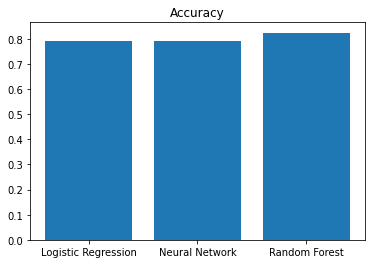

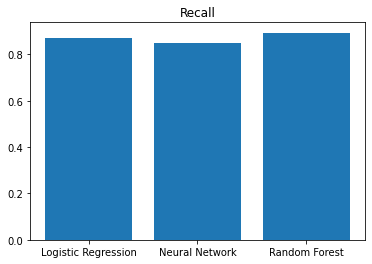

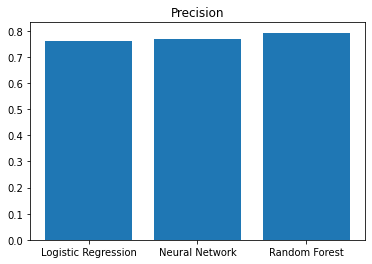

In [12]:
plt.bar(['Logistic Regression', 'Neural Network', 'Random Forest'], [logistic_regression_accuracy, neural_network_accuracy, forest_accuracy])
plt.title('Accuracy')
plt.show()
plt.bar(['Logistic Regression', 'Neural Network', 'Random Forest'], [logistic_regression_recall, neural_network_recall, forest_recall])
plt.title('Recall')
plt.show()
plt.bar(['Logistic Regression', 'Neural Network', 'Random Forest'], [logistic_regression_precision, neural_network_precision, forest_precision])
plt.title('Precision')
plt.show()

As we can see Random Forest is performing a little bit better then the other models, but the differences are very small.\
It is also worth noting, that hyperparameter tuning, regularization methods or creating better featuers could probably significantly increase the metrics.